# Laptop Özelliklerinin Fiyatlandırmaya Etkisi 

### Amaç :
Bu projeni amacı bir laptop veri setini kullanıp analizler yaparak fiyat tahmini yapabilecek bir model geliştirmek.
### Özet :
Öncelikle veri setimizi inceledik. Ham veride eksik olup olmadığını kontrol ettik.Verimizi işlemek
için gereksiz eklerden (gb,kg vb.) kurtulduk ve verileri sayısal değerlere indirgedik. Bu değerleri 
yeni sutunlar açarak listeledik. Verileri görselleştirip anlamlar çıkardık ve son olarak farklı modeller oluşturup veri setimizin R2 ve RMSE değerlerini görerek en performanslı modeli belirledik.

#### Not:
Projeyi Anaconda üzerinden açmanızı tavsiye ediyorum. Anaconda içerisinde hazır bulunan kütüphaneler kullandım.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Kütüphane kurulumları.

In [2]:
df = pd.read_csv('laptop_data.csv')

### Veri Seti Özellikleri

In [3]:
df.head()
#Veri setinin ilk 5 satırı görüntülenir

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.columns
#Veri setindeki sütunları listeler

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [5]:
df.shape
#Veri setinin şeklini (satır ve sütun) saylarını verir.

(1303, 12)

In [6]:
df.dtypes
#Veri setinde bulunan sütunların veri tiplerini gösteriyor.

Unnamed: 0            int64
Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object

In [7]:
df.isnull().sum()
#Verinin sütunlarında boş doğer var mı yok mu var ise de toplamlarını veriyor.

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

<Axes: >

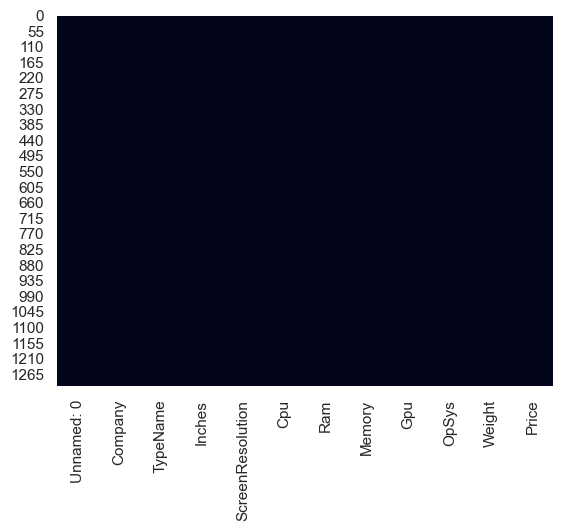

In [8]:
sns.set_theme()
sns.heatmap(df.isnull(), cbar=False)
#Verinin sütunlarında bulunan boş değerleri grafikleştiriyor. Veride boş olmadığının sağğlamasını yapıyoruz.

In [9]:
df.info()
#Veri hakkında temel bilgileri görüyoruz.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


### Veri Ön İşleme ve EDA (Keşfedici veri analizi)

In [10]:
df["Ram"].describe()
#"Ram" sütununun bilgileri gösteriliyor.

count     1303
unique       9
top        8GB
freq       619
Name: Ram, dtype: object

In [11]:
df["Ram"].replace("GB","",regex=True, inplace=True)
df["Ram"] = df["Ram"].astype("float64")
#"Ram" sütununda bulunan "GB" ifadesini kaldıtrıyoruz ve sayısal bir tipe dönüştürüyoruz. İşlem yapabilmek için sayısal olamalı 

C:\Users\salih\AppData\Local\Temp\ipykernel_6056\1238949139.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Ram"].replace("GB","",regex=True, inplace=True)


In [12]:
df["Ram"].describe()
#Ram sütununun uç değerlerine istatistiksel verilerine bakıyoruz.

count    1303.000000
mean        8.382195
std         5.084665
min         2.000000
25%         4.000000
50%         8.000000
75%         8.000000
max        64.000000
Name: Ram, dtype: float64

In [13]:
df["Weight"].describe()
#"Weight" sütununun bilgileri gösteriliyor.

count      1303
unique      179
top       2.2kg
freq        121
Name: Weight, dtype: object

In [14]:
df["Weight"].replace("kg","",regex=True, inplace=True)
df["Weight"] = df["Weight"].astype("float64")
#"Weight" sütununda bulunan "kg" ifadesini kaldıtrıyoruz ve sayısal bir tipe dönüştürüyoruz. İşlem yapabilmek için sayısal olamalı 

C:\Users\salih\AppData\Local\Temp\ipykernel_6056\3370209191.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Weight"].replace("kg","",regex=True, inplace=True)


In [15]:
df["Weight"].describe()
#"Weight" sütununun uç değerlerine istatistiksel verilerine bakıyoruz.

count    1303.000000
mean        2.038734
std         0.665475
min         0.690000
25%         1.500000
50%         2.040000
75%         2.300000
max         4.700000
Name: Weight, dtype: float64

In [16]:
df["Inches"].describe()
#Inches sütununa bakıyoruz zaten sayısal bir tip o nedenle bir dönüşüme ihtiyaç yok.

count    1303.000000
mean       15.017191
std         1.426304
min        10.100000
25%        14.000000
50%        15.600000
75%        15.600000
max        18.400000
Name: Inches, dtype: float64

In [17]:
df.dtypes
# Sütunlarımızın veri tiplerine bakıyoruz.

Unnamed: 0            int64
Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                 float64
Memory               object
Gpu                  object
OpSys                object
Weight              float64
Price               float64
dtype: object

In [18]:
average_prices = df.groupby("Company")["Price"].mean().sort_values()

# Markalara pahalılık sırasına göre sayısal değer atama
ranking = {company: rank for rank, company in enumerate(average_prices.index, 1)}
df["Company_Numeric"] = df["Company"].map(ranking)

df.head()

#"Company" yani markalar sütununda bulunan markaları ortalama fiyatlarına göre sıralıyoruz ve sayısal değer veriyoruz çıktılarımızı yeni bir sütun olarak ekliyoruz.

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Company_Numeric
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,14
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,14
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,6
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,14
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,14


In [19]:
df["Company_Numeric"].describe()
#"Company" sütununun verilerini sayısal olaraka saklayan "Company_Numeric" sütununun değerlerine bakıyoruz.

count    1303.000000
mean        8.170376
std         3.052809
min         1.000000
25%         6.000000
50%         7.000000
75%        10.000000
max        19.000000
Name: Company_Numeric, dtype: float64

In [20]:
df.head()
#İlk beş satırı listeliyoruz.

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Company_Numeric
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,14
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,14
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,6
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,14
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,14


In [21]:
import re

# Toplam kapasiteyi hesaplayan fonksiyon
def calculate_total_memory(memory):
    total_memory = 0
    for part in memory.split('+'):
        part = part.strip()
        if 'TB' in part:  # TB'yi GB'ye çevir
            total_memory += int(re.search(r'\d+', part).group()) * 1024
        elif 'GB' in part:  # GB'yi doğrudan al
            total_memory += int(re.search(r'\d+', part).group())
    return total_memory

# Toplam kapasite (GB cinsinden)
df['Total_Capacity'] = df['Memory'].apply(calculate_total_memory)

# Kapasiteye göre küçükten büyüğe sıralama (kapasite arttıkça rank artar)
df['Capacity_Rank'] = df['Total_Capacity'].rank(method='dense', ascending=True).astype(int)

# Verileri küçükten büyüğe sıralama
df = df.sort_values(by='Total_Capacity', ascending=True).reset_index(drop=True)

print(df[['Memory', 'Total_Capacity', 'Capacity_Rank']])

#"Memory" sütununda ssd hdd vb. değerler karmaşık olduğu ve fiyata göre doğru değer vermeyeceğinden toplam kapasiteyi hesaplayan bir fonksiyon yazıyoruz ve aynı şekilde sayısal değerler atıyarak listeliyoruz.


                    Memory  Total_Capacity  Capacity_Rank
0                  8GB SSD               8              1
1                 16GB SSD              16              2
2       16GB Flash Storage              16              2
3       16GB Flash Storage              16              2
4       16GB Flash Storage              16              2
...                    ...             ...            ...
1298  256GB SSD +  2TB HDD            2304             21
1299  256GB SSD +  2TB HDD            2304             21
1300  512GB SSD +  2TB HDD            2560             22
1301  512GB SSD +  2TB HDD            2560             22
1302  512GB SSD +  2TB HDD            2560             22

[1303 rows x 3 columns]


In [22]:
df.head()
#veri setinin ilk 5 satırı

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Company_Numeric,Total_Capacity,Capacity_Rank
0,950,HP,Workstation,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6820HQ 2.7GHz,8.0,8GB SSD,Nvidia Quadro M1000M,Windows 10,2.00,119826.720,6,8,1
1,504,Lenovo,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4.0,16GB SSD,Intel HD Graphics 400,Chrome OS,1.25,14119.200,7,16,2
2,430,Samsung,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4.0,16GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.15,14332.320,12,16,2
3,1049,Asus,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4.0,16GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.20,15339.312,8,16,2
4,817,HP,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4.0,16GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.23,20512.800,6,16,2


In [23]:

average_price_by_os = df.groupby("Cpu")["Price"].mean().sort_values()


cp_ranking = {os: rank for rank, os in enumerate(average_price_by_os.index, 1)}
df["Cpu_Numeric"] = df["Cpu"].map(cp_ranking)

print(df[["Cpu", "Cpu_Numeric"]].drop_duplicates().sort_values("Cpu_Numeric"))

#"Cpu" sütun verilerini ortalama ücretlerine göre listeliyor ve değer atıyoruz yeni bir sütun olarak veri setine ekliyoruz.


                                       Cpu  Cpu_Numeric
52             AMD E-Series E2-6110 1.5GHz            1
21             Intel Atom X5-Z8350 1.44GHz            2
5     Intel Celeron Dual Core 3205U 1.5GHz            3
18             Intel Atom x5-Z8350 1.44GHz            4
65             Intel Atom x5-Z8300 1.44GHz            5
...                                    ...          ...
1255           Intel Core i7 6920HQ 2.9GHz          114
805                   Intel Core i7 2.9GHz          115
533            Intel Core i7 7820HK 2.9GHz          116
254          Intel Xeon E3-1535M v5 2.9GHz          117
990          Intel Xeon E3-1535M v6 3.1GHz          118

[118 rows x 2 columns]


In [24]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Company_Numeric,Total_Capacity,Capacity_Rank,Cpu_Numeric
0,950,HP,Workstation,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6820HQ 2.7GHz,8.0,8GB SSD,Nvidia Quadro M1000M,Windows 10,2.00,119826.720,6,8,1,109
1,504,Lenovo,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4.0,16GB SSD,Intel HD Graphics 400,Chrome OS,1.25,14119.200,7,16,2,10
2,430,Samsung,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4.0,16GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.15,14332.320,12,16,2,10
3,1049,Asus,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4.0,16GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.20,15339.312,8,16,2,10
4,817,HP,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4.0,16GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.23,20512.800,6,16,2,10


In [25]:

average_price_by_os = df.groupby("Gpu")["Price"].mean().sort_values()


gp_ranking = {os: rank for rank, os in enumerate(average_price_by_os.index, 1)}
df["Gpu_Numeric"] = df["Gpu"].map(gp_ranking)


print(df[["Gpu", "Gpu_Numeric"]].drop_duplicates().sort_values("Gpu_Numeric"))

#"Gpu" sütun verilerini ortalama ücretlerine göre listeliyor ve değer atıyoruz yeni bir sütun olarak veri setine ekliyoruz.

                           Gpu  Gpu_Numeric
52               AMD Radeon R2            1
1        Intel HD Graphics 400            2
127     AMD Radeon R2 Graphics            3
11       Intel HD Graphics 500            4
610              AMD Radeon R3            5
...                        ...          ...
254       Nvidia Quadro M2000M          106
1283  Nvidia GeForce GTX 1070M          107
355       Nvidia Quadro M3000M          108
864    Nvidia GeForce GTX 980           109
533    Nvidia GeForce GTX 1080          110

[110 rows x 2 columns]


In [26]:
df["IPS_Panel"] = df["ScreenResolution"].apply(lambda x: 1 if "IPS" in x else 0)

#Laptop fiyatlarında IPS panelin önemini biliyoruz IPS panel olanların bir adım önde olması gerektiğini düşünüyorum ve var mı yok mu kontrol edip yeni bir sütun ekliyoruz.


In [27]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Company_Numeric,Total_Capacity,Capacity_Rank,Cpu_Numeric,Gpu_Numeric,IPS_Panel
0,950,HP,Workstation,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6820HQ 2.7GHz,8.0,8GB SSD,Nvidia Quadro M1000M,Windows 10,2.00,119826.720,6,8,1,109,88,1
1,504,Lenovo,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4.0,16GB SSD,Intel HD Graphics 400,Chrome OS,1.25,14119.200,7,16,2,10,2,0
2,430,Samsung,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4.0,16GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.15,14332.320,12,16,2,10,2,0
3,1049,Asus,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4.0,16GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.20,15339.312,8,16,2,10,2,0
4,817,HP,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4.0,16GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.23,20512.800,6,16,2,10,2,0


### Veri Görselleştirme ve Özellik Mühendisliği

<Axes: xlabel='OpSys'>

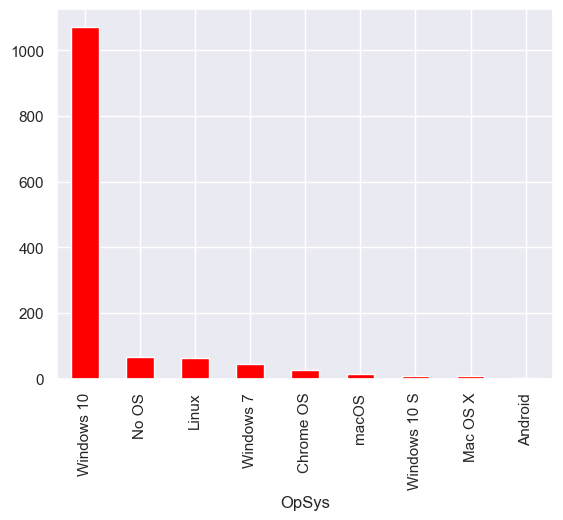

In [28]:
df["OpSys"].value_counts().plot(kind="bar", color="red")
#Veri setinde hangi işletim sisteminin ne kadar olduğu kaç adet pc de bulunduğu gösteriliyor.

<Axes: xlabel='Company'>

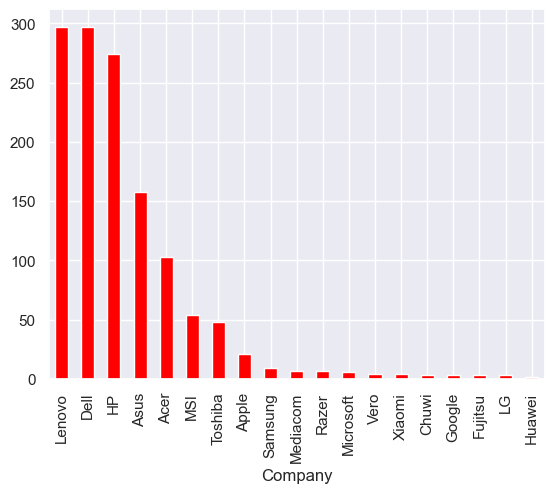

In [29]:
df["Company"].value_counts().plot(kind="bar", color="red")
#Hangi markalardan ne kadar olduğuna bakıyoruz.

<Axes: xlabel='TypeName'>

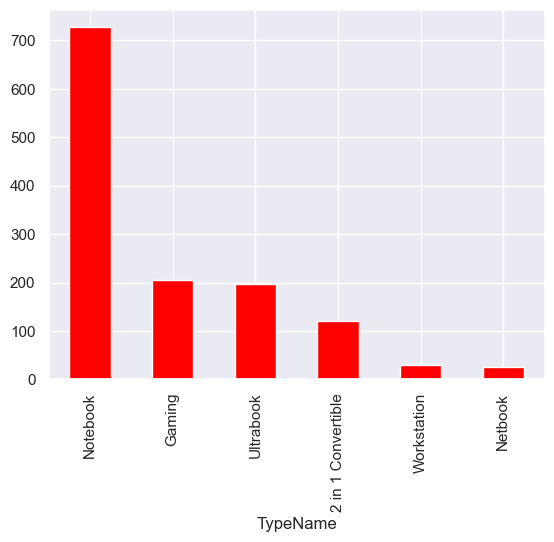

In [30]:
df["TypeName"].value_counts().plot(kind="bar", color="red")
#Laptop modellerinin neler olduğu kaç adet olduğuna bakıyor ve nasıl bir işlem yapılabileceğini anlıyoruz.

<Axes: xlabel='OpSys', ylabel='Company'>

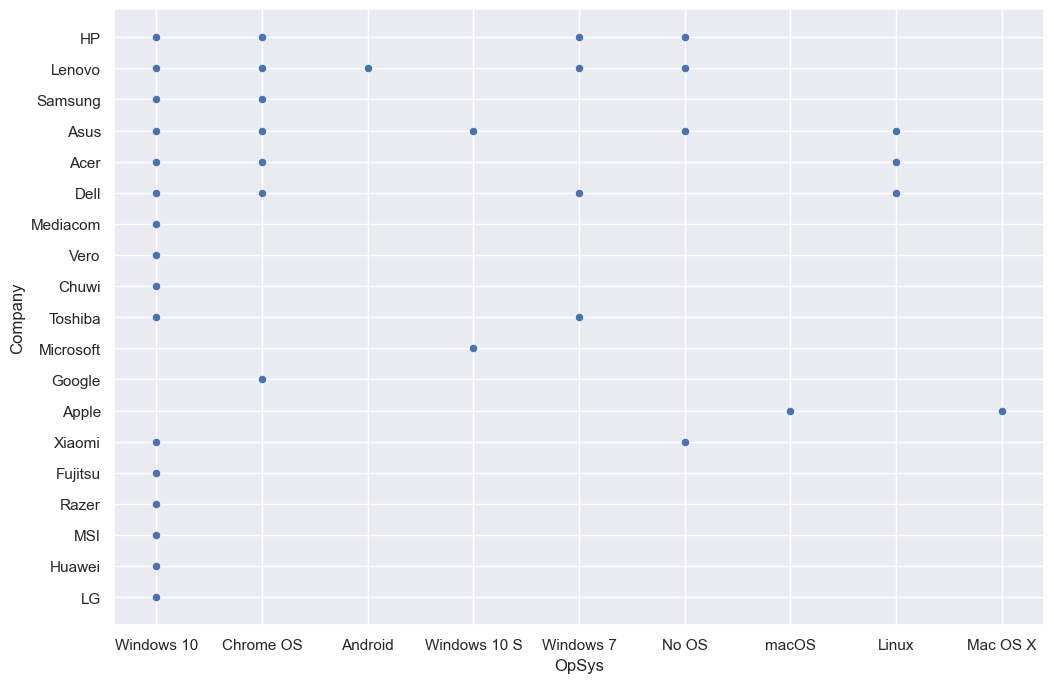

In [31]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df , y="Company", x="OpSys")

#Hangi  markaların hangi işletim sistemlerini kullandığına bakıyor ve ortalama bir statü farkını görüyoruz.

In [32]:
opsys_mapping = {
    'Mac OS X': 18,
    'macOS': 20,
    'Windows 10': 8,
    'Windows 10 S':9,
    'Linux':2,
    'Windows 7':7,
    'Android':1,
    'Chrome OS':2,
    'No OS':3  
}
df['opys_numeric'] = df['OpSys'].map(opsys_mapping)
df.head()

#İşletim sistemlerine sözlük kullanarak manuel değerler atıyoruz ve bunları yeni bir sütun olarak listeliyoruz.

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Company_Numeric,Total_Capacity,Capacity_Rank,Cpu_Numeric,Gpu_Numeric,IPS_Panel,opys_numeric
0,950,HP,Workstation,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6820HQ 2.7GHz,8.0,8GB SSD,Nvidia Quadro M1000M,Windows 10,2.00,119826.720,6,8,1,109,88,1,8
1,504,Lenovo,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4.0,16GB SSD,Intel HD Graphics 400,Chrome OS,1.25,14119.200,7,16,2,10,2,0,2
2,430,Samsung,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4.0,16GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.15,14332.320,12,16,2,10,2,0,2
3,1049,Asus,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4.0,16GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.20,15339.312,8,16,2,10,2,0,2
4,817,HP,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4.0,16GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.23,20512.800,6,16,2,10,2,0,2


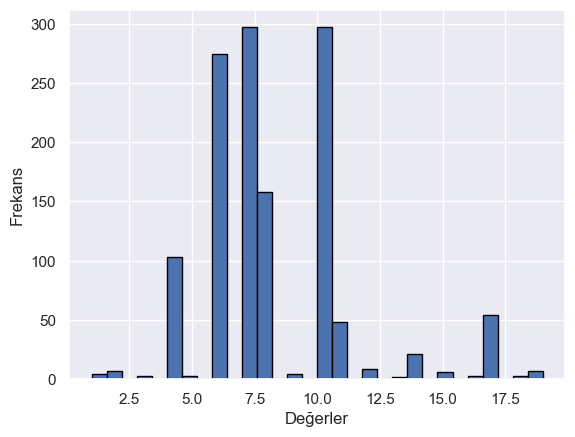

In [33]:
df['Company_Numeric'].hist(bins=30, edgecolor='black')
plt.xlabel('Değerler')
plt.ylabel('Frekans')
plt.show()
#Markalara verdiğimiz değerler vardı bu değerlerin dağılımına bakıyoruz.

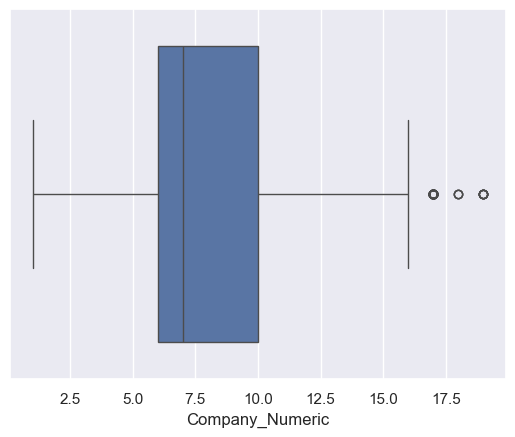

In [34]:
sns.boxplot(x=df['Company_Numeric'])
plt.show()
#Değerler arasında uç değerler yani aykırıların olup olmadığına bakıyoruz.

<Axes: xlabel='TypeName'>

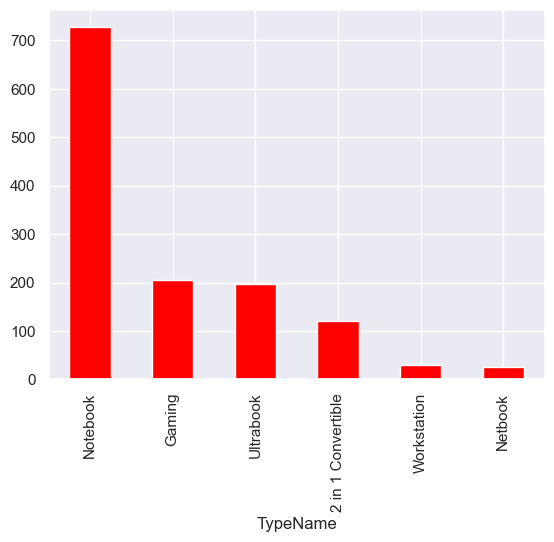

In [35]:
df["TypeName"].value_counts().plot(kind="bar", color="red")

In [36]:
type_mapping = {
    'Gaming': 8,
    'Ultrabook': 8,
    'Notebook': 8,
    '2 in 1 Convertible':3,
    'Workstation':2,
    'Netbook':1   
}
df['type_numeric'] = df['TypeName'].map(type_mapping)
df.head()


#Pc modellerine sözlük kullanarak manuel olarak ve kendimce değerler atıyoruz ve bunları yeni bir sütun olarak listeliyoruz.

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Company_Numeric,Total_Capacity,Capacity_Rank,Cpu_Numeric,Gpu_Numeric,IPS_Panel,opys_numeric,type_numeric
0,950,HP,Workstation,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6820HQ 2.7GHz,8.0,8GB SSD,Nvidia Quadro M1000M,Windows 10,2.00,119826.720,6,8,1,109,88,1,8,2
1,504,Lenovo,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4.0,16GB SSD,Intel HD Graphics 400,Chrome OS,1.25,14119.200,7,16,2,10,2,0,2,1
2,430,Samsung,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4.0,16GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.15,14332.320,12,16,2,10,2,0,2,1
3,1049,Asus,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4.0,16GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.20,15339.312,8,16,2,10,2,0,2,1
4,817,HP,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4.0,16GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.23,20512.800,6,16,2,10,2,0,2,1


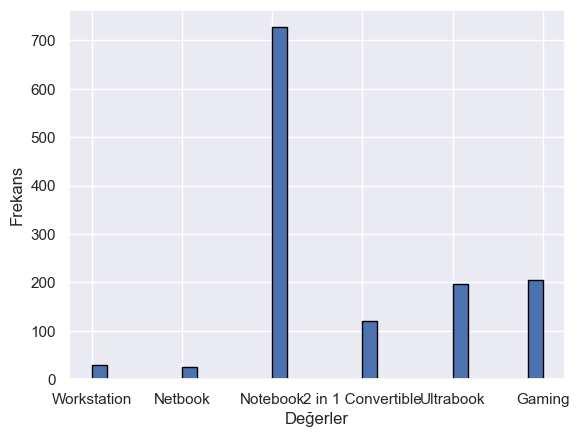

In [37]:
df['TypeName'].hist(bins=30, edgecolor='black')
plt.xlabel('Değerler')
plt.ylabel('Frekans')
plt.show()
# pc modellerinin dağılımına bakıyoruz.

In [38]:
df.columns
# Veri setimizde oluşan tüm sutunları listeliyoruz.

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price',
       'Company_Numeric', 'Total_Capacity', 'Capacity_Rank', 'Cpu_Numeric',
       'Gpu_Numeric', 'IPS_Panel', 'opys_numeric', 'type_numeric'],
      dtype='object')

In [39]:

x = df[['Inches','Ram','Weight','Gpu_Numeric',
       'Company_Numeric', 'opys_numeric', 'Capacity_Rank', 'Cpu_Numeric',
       'IPS_Panel','type_numeric']]
y = df[["Price"]]

# Özellikleri ve hedef aldığımız değişkenleri belirliyoruz.

### Modelleme ve Sonuç

In [40]:
x.shape,y.shape
# Değişkenlerin satır ve sütunlarına bakıyoruz.

((1303, 10), (1303, 1))

In [41]:
df = df.dropna()
# Gözden kaçmaz lakin varsa işlemeden önce boş verileri temizliyoruz.

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor, GradientBoostingRegressor
from sklearn import svm
import numpy as np
#Gerekli kütüphaneler kuruluyor.

def model_test(x, y):
    lr=LinearRegression()
    r =Ridge()
    l =Lasso()
    en= ElasticNet()
    dt=DecisionTreeRegressor()
    et=ExtraTreesRegressor()
    rf=RandomForestRegressor()
    gb=GradientBoostingRegressor()
    kr=KNeighborsRegressor()
    sv=svm.SVR()
#kullanışlı ve görünür olaması açısından modelleri bir nevi kısayollara atıyoruz

    
    modeller=[lr, r, l, en, dt, et, sv,rf,gb,kr]
    #modellerin bulunduğu listeyi oluşturuyoruz.
    model_isimler=["Linear Regression", "Ridge", "Lasso", "Elastic Net", "Decision Tree", "Extra Trees", "KNeighbors","Gradient Boosting" ,"Random Forest", "Support Vector Machine"]
    #Listelemede rahat görebilmek için model isimlerini saklıyoruz
    r2ler = []
    #Modellerin r2 skorlarının dolduracağı boş liste
    rmseler = []
    #Modellerin rms lerinin dolduracağı boş liste
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)
    #Veri eğitim ve test olarak ayrılır eğitim %80 test %20
    
    for model in modeller:
        model.fit(x_train, y_train)
        #fit fonksiyonu model eğitir
        tahmin = model.predict(x_test)
        #predict ile tahmin yapılır.
        r2ler.append(np.round(r2_score(y_test, tahmin)*100,2))
        #r2 skorunu yüzde ile ifade etmek için 100 ile çarpıyoruz
        rmseler.append(np.round(mean_squared_error(y_test, tahmin) ** .5,2))

    #Modelleri eğitim ve test verileri üzerinde çalıştırıyoruz.

    sonuc={"Model":model_isimler, "R2 Skor":r2ler, "RMSE":rmseler}
    sonuc=pd.DataFrame(sonuc)
    sonuc=sonuc.sort_values(by="R2 Skor", ascending=False)
    return sonuc

In [43]:
model_test(x,y)

c:\Users\salih\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\salih\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\salih\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\salih\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, 

,Model,R2 Skor,RMSE
5,Extra Trees,88.70,12336.13
7,Gradient Boosting,88.28,12564.92
8,Random Forest,86.23,13615.68
4,Decision Tree,80.36,16264.86
9,Support Vector Machine,77.23,17511.80
3,Elastic Net,74.34,18588.18
1,Ridge,73.59,18858.85
2,Lasso,73.59,18860.98
0,Linear Regression,73.58,18861.80
6,KNeighbors,-3.18,37276.25
